# Pandas Week 8

# 29. Random Sampling pada Pandas Data Frame

In [3]:
#import modules
import pandas as pd
import numpy as np 

#check Version
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


#Data Frame Prep
d = {'col_1':[1,2,3,4,5],
    'col_2':[6,7,8,9,10]}
df= pd.DataFrame(d)
df

# Random sampling with/without replacement

- Random Sampling with (replace =True) replacement berarti data-data yang sudah disampling di population memiliki kesempatan untuk kita sampling lagi 

- Random Sampling without replacement (replace =False) berarti data-data yang sudah disampling di population tidak akan kita sampling lagi 

In [5]:
df.sample(n=4, replace=False, random_state=0)

,col_1,col_2
2,3,8
0,1,6
1,2,7
3,4,9


In [6]:
df.sample(n=4, replace=True, random_state=0)

,col_1,col_2
4,5,10
0,1,6
3,4,9
3,4,9


note:
- parameter n adalah jumlah data 
- paramter random_state bisa ditentukan dengan nilai integer berapanpun. Fungsi utama dari paramter ini adalah untuk menjamin agar suatu eksperimen dapat direplikasi atau dapat dilakukan ulang dengan hasil yang sama persis

# 30. Akses nilai variabel dalam fungsi query

In [16]:
#import modules
import pandas as pd
import numpy as np 

#check Version
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


In [17]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

qf = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
qf

,A,B,C,D,E
0,1,9,8,16,10
1,13,6,15,12,15
2,8,2,18,12,7
3,18,9,8,18,3
4,18,10,12,14,5


# Akses nilai varialbe pada query()

method  query() ini digunakan untuk melakukan seleksi baris 

In [18]:
qf.query('A > 5') 

,A,B,C,D,E
1,13,6,15,12,15
2,8,2,18,12,7
3,18,9,8,18,3
4,18,10,12,14,5


method query diatas digunakan untuk menyeleksi baris-baris yang nilai pada kolom Anya lebih besar dari 5

In [19]:
rerata = qf['A'].mean()
rerata

11.6

variable rerata diatas digunakan untuk menampung nilai mean dari kolom A

In [20]:
qf.query('A > @rerata')

,A,B,C,D,E
1,13,6,15,12,15
3,18,9,8,18,3
4,18,10,12,14,5


method query diatas akan menampilkan baris-baris yang nilai kolom A nya diatas rata-ratanya

# 31. Tipe Data Ordinal pada Pandas Data Frame

In [21]:
#import modules
import pandas as pd
import numpy as np 

#check Version
print(pd.__version__)
print(np.__version__)


1.1.3
1.19.2


In [33]:
#Data Frame Prep
d = {'Pelanggan':[11,12,13,14],
    'kepuasan':['baik','cukup','buruk','sangat baik']}
of= pd.DataFrame(d)
of

,Pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,sangat baik


# Tipe data ordinal pada Pandas

In [34]:
from pandas.api.types import CategoricalDtype #CategoricalDtype digunakan untuk menspesifikasikan urutan ordinalnya

In [35]:
tingkat_kepuasan = CategoricalDtype(['buruk','cukup','baik','sangat baik'],
                                    ordered=True)

of['kepuasan'] = of['kepuasan'].astype(tingkat_kepuasan)
of


,Pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,sangat baik


tipe data tingkat_kepuasan adalah tipe data ordinal yang sudah kita spesifikasikan urutannya

In [36]:
of = of.sort_values('kepuasan', ascending=True) #menampilkan data yang  diurutkan dari nilai kolom kepuasaan yang paling besar
of

,Pelanggan,kepuasan
2,13,buruk
1,12,cukup
0,11,baik
3,14,sangat baik


In [37]:
of[of['kepuasan'] >= 'cukup'] #menampilkan data yang nilai kolom kepuasannya lebih besar dari cukup

,Pelanggan,kepuasan
1,12,cukup
0,11,baik
3,14,sangat baik


# 32. Plotting pada Pandas Data Frame

In [38]:
#import modules
import pandas as pd
import numpy as np 

#check Version
print(pd.__version__)
print(np.__version__)


1.1.3
1.19.2


In [60]:
#Data Frame Prep
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

pf = pd.DataFrame(np.random.randint(1, 10, size=(n_rows, n_cols)), 
                  columns=cols)
pf.head()

,A,B,C,D,E
0,3,5,6,5,7
1,6,8,3,5,4
2,4,4,9,4,6
3,9,5,4,5,7
4,8,3,3,6,2


- Untuk melakukan plotting kita hanya cukup menggunakan parameter .plot() dan memberi parameter kind dan memberinya nilai (sumbu x merepresentasikan baris dan sumbu y merepresentasikan nilai yang tertampung di data Frame kita (lihat contoh 1 untuk setiap jenis plot))
- Untuk melakukan plotting untuk  beberapa kolom tertentu saja kita dapat menggunakan method seperti di contoh 2 untuk setiap jenis plot (khusus scatter plot tidak bisa dikarenakan plotting ini mengharuskan kita untuk menentukan nilai sumbu x dan sumbu y nya)
- Berikut adalah beberapa paramter kind yang nilainya bisa kita rubah sesuai dengan bentuk plot yang ingin kita tampilkan: 

# Line Plot

<AxesSubplot:>

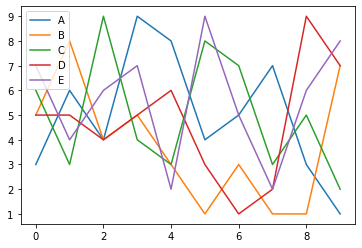

In [61]:
#Contoh 1
pf.plot(kind='line')

<AxesSubplot:>

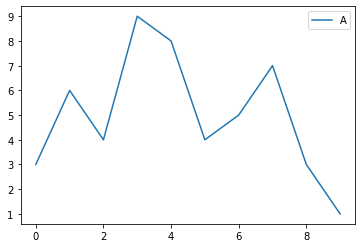

In [62]:
#Contoh 2
pf[['A']].plot(kind='line')

# Bar Plot

<AxesSubplot:>

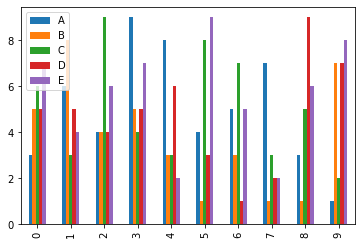

In [63]:
#Contoh 1
pf.plot(kind='bar')

<AxesSubplot:>

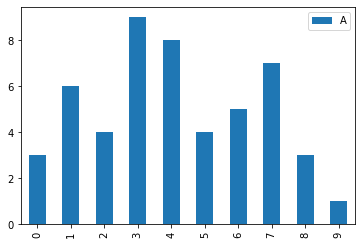

In [64]:
#Contoh 2
pf[['A']].plot(kind='bar')

<AxesSubplot:>

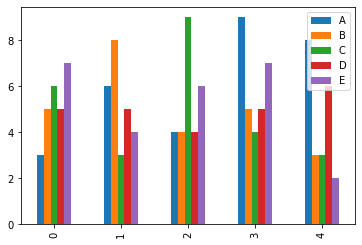

In [65]:
pf.head().plot(kind='bar')

- Jika kita ingin membuat bar plot secara horizontal kita cukup menggunakan barh sebagai nilai di parameter kind

<AxesSubplot:>

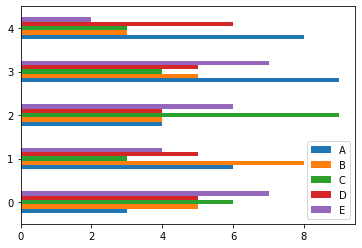

In [72]:
pf.head().plot(kind='barh')

note: Jika kita hanya ingin menampilkan 5 data pertama saja kita dapat menggunakan method .head() sebelum method .plot()

# Area Plot

<AxesSubplot:>

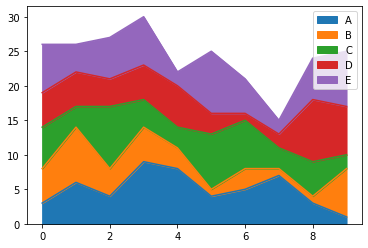

In [73]:
#Contoh 1
pf.plot(kind='area')

<AxesSubplot:>

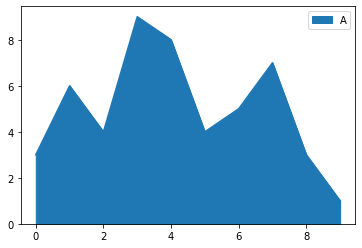

In [75]:
#Contoh 2
pf[['A']].plot(kind='area')

# Box Plot

<AxesSubplot:>

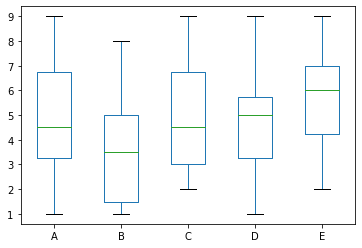

In [76]:
#Contoh 1
pf.plot(kind='box')

<AxesSubplot:>

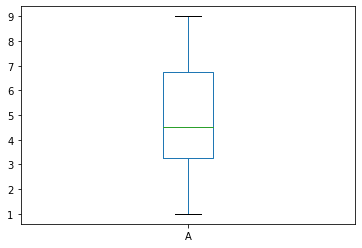

In [77]:
#Contoh 2
pf[['A']].plot(kind='box')

# Histogram

<AxesSubplot:ylabel='Frequency'>

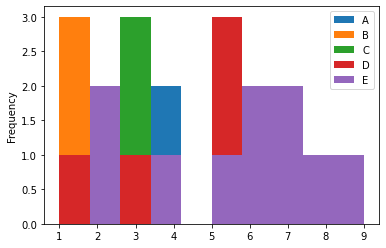

In [78]:
#Contoh 1
pf.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

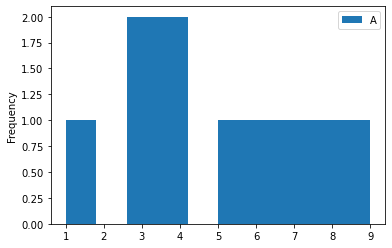

In [82]:
#Contoh 2
pf[['A']].plot(kind='hist')

# Kernel Density Estimation (KDE)

<AxesSubplot:ylabel='Density'>

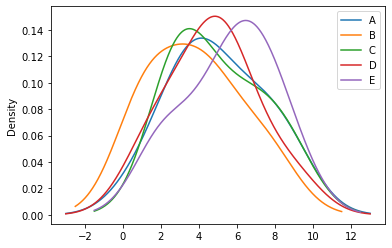

In [83]:
#Contoh 1
pf.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

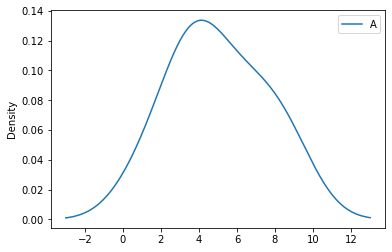

In [84]:
#Contoh 2
pf[['A']].plot(kind='kde')

# Scatter Plot

- Untuk Scatter Plot sebelum kita memanggil paramter kind kita harus mencantumkan parameter x (sumbu x) dan paramter y (sumbu y) beserta nilainya

<AxesSubplot:xlabel='A', ylabel='D'>

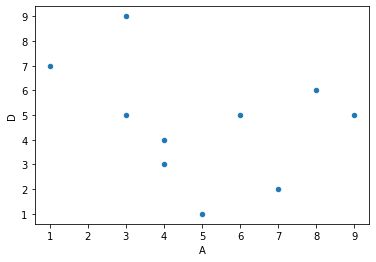

In [88]:
pf.plot(x='A', y='D', kind='scatter')

source: https://www.youtube.com/playlist?list=PL2O3HdJI4voGdD_9xhVCTBoDTDNHpajm5